In [175]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import sys
sys.path.append('./src/')
import common_utils,my_ensembler, feature_utils, defines, model_utils, my_bert, classes
import numpy as np
import imp
import pandas as pd
import seaborn as sns
from sklearn_crfsuite import CRF
import matplotlib.pyplot as plt
import os

In [176]:
os.getcwd()

'/scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis'

In [13]:
dir_name='duplicate'
final_pred_name='merged.crf.bert.ens.c.w.l'
final_feature_name='local.plot.tfidf.30'
dataset_name='dataset_tf.word.char.lemma.full_splits'
cv_split_name='cv_splits_per_client'
seq_len=15
step=15
file_prefix='usampl'

In [173]:
all_pred_crf01=common_utils.load_db(dir_name,final_pred_name)

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/merged.crf.bert.ens.c.w.l.csv,  index False


In [187]:
imp.reload(classes)
imp.reload(common_utils)
dummy_doc=classes.DummyDoc()
us=classes.MyUndersamplerDoc(dummy_doc)
us.undersample(ratio='majority')

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/99_selected_indices.json


In [188]:
vars(us)

{'doc': <classes.DummyDoc at 0x2b26b265eaf0>,
 'ratio': 'majority',
 'reshaped_y': array([[0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0]]),
 'rus': RandomUnderSampler(random_state=42, sampling_strategy='majority'),
 'selected_y': array([0, 0, 0, 1, 1, 1]),
 'selected_indices': array([0, 1, 3, 4, 5, 8])}

In [189]:
import os
os.path.basename(dataset.path)

'duplicate'

In [193]:
dataset=common_utils.load_pickle(dir_name,dataset_name)

In [194]:
len(dataset.doc_map[1].sent_list)

613

In [198]:
len(dataset.doc_map[1].sent_list)

512

In [196]:
imp.reload(common_utils)
imp.reload(classes)

<module 'classes' from './src/classes.py'>

In [14]:
cv_splits_loaded=common_utils.load_json(dir_name,cv_split_name)

Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/cv_splits_per_client.json


## Retrain BERT on resampled

In [226]:
imp.reload(common_utils)
imp.reload(my_bert)
imp.reload(model_utils)
bert_pred=my_bert.prepared_cross_validate_bert(docs_map=dataset,
                                                cv_splits=cv_splits_loaded,
                                                epoch=2,
                                                batch_size=512,
                                                dir_name=dir_name,
                                                file_prefix=file_prefix)

BertXYTransformer>>>>>>>init() called
BertDatasetransformer>>>>>>>init() called
BertDatasetransformer>>>>>>>init() called
0 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 69 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 15730 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 10 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 3220 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [1. 1.]

 Epoch 1 / 2

Evaluating...
Saving best model bert

Training Loss: 0.667

Validation Loss: 0.625

 Epoch 2 / 2

Evaluating...
Saving best model bert

Training Loss: 0.602

Validation Loss: 0.601
0 split train_validate took 00:09:43
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_0_bert_valid_dict_usampl.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_0_usampl.csv, 
index False
float_format %.5f
1 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 69 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 16784 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 10 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 2166 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [1. 1.]

 Epoch 1 / 2

Evaluating...
Saving best model bert

Training Loss: 0.664

Validation Loss: 0.612

 Epoch 2 / 2

Evaluating...
Saving best model bert

Training Loss: 0.601

Validation Loss: 0.585
1 split train_validate took 00:10:33
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_1_bert_valid_dict_usampl.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_1_usampl.csv, 
index False
float_format %.5f
2 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 69 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 15252 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 10 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 3698 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [1. 1.]

 Epoch 1 / 2

Evaluating...
Saving best model bert

Training Loss: 0.671

Validation Loss: 0.629

 Epoch 2 / 2

Evaluating...
Saving best model bert

Training Loss: 0.605

Validation Loss: 0.600
2 split train_validate took 00:09:56
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_2_bert_valid_dict_usampl.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_2_usampl.csv, 
index False
float_format %.5f
3 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 70 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 18436 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 9 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 514 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [1. 1.]

 Epoch 1 / 2

Evaluating...
Saving best model bert

Training Loss: 0.665

Validation Loss: 0.722

 Epoch 2 / 2

Evaluating...

Training Loss: 0.599

Validation Loss: 0.741
3 split train_validate took 00:12:19
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_3_bert_valid_dict_usampl.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_3_usampl.csv, 
index False
float_format %.5f
4 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 69 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 15936 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 10 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 3014 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [1. 1.]

 Epoch 1 / 2

Evaluating...
Saving best model bert

Training Loss: 0.661

Validation Loss: 0.644

 Epoch 2 / 2

Evaluating...

Training Loss: 0.600

Validation Loss: 0.645
4 split train_validate took 00:10:15
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_4_bert_valid_dict_usampl.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_4_usampl.csv, 
index False
float_format %.5f
5 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 69 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 16778 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 10 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 2172 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [1. 1.]

 Epoch 1 / 2

Evaluating...
Saving best model bert

Training Loss: 0.661

Validation Loss: 0.594

 Epoch 2 / 2

Evaluating...
Saving best model bert

Training Loss: 0.602

Validation Loss: 0.566
5 split train_validate took 00:10:46
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_5_bert_valid_dict_usampl.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_5_usampl.csv, 
index False
float_format %.5f
6 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 69 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 16130 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 10 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 2820 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [1. 1.]

 Epoch 1 / 2

Evaluating...
Saving best model bert

Training Loss: 0.663

Validation Loss: 0.622

 Epoch 2 / 2

Evaluating...
Saving best model bert

Training Loss: 0.600

Validation Loss: 0.608
6 split train_validate took 00:10:19
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_6_bert_valid_dict_usampl.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_6_usampl.csv, 
index False
float_format %.5f
7 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 69 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 17604 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 10 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 1346 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [1. 1.]

 Epoch 1 / 2

Evaluating...
Saving best model bert

Training Loss: 0.656

Validation Loss: 0.561

 Epoch 2 / 2

Evaluating...
Saving best model bert

Training Loss: 0.601

Validation Loss: 0.544
7 split train_validate took 00:11:00
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_7_bert_valid_dict_usampl.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_7_usampl.csv, 
index False
float_format %.5f


In [228]:
imp.reload(classes)
bert_report=classes.MyScoreSummarizer(pred_df=bert_pred,fix_list=[],prefixes=['bert'])
bert_report.get_all_scores('split')
bert_report.print_df['bert'].index.name='label'
common_utils.save_db(bert_report.print_df['bert'],dir_name,'bert.report.tf.per.split.{}'.format(file_prefix),keep_index=True,float_format='%.3f')
common_utils.save_db(bert_pred,dir_name,'bert.pred.tf.per.split.{}'.format(file_prefix),keep_index=True,float_format='%.3f')

MyScoreSummarizer init called
MyReport init called
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert.report.tf.per.split.usampl.csv, 
index True
float_format %.3f
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert.pred.tf.per.split.usampl.csv, 
index True
float_format %.3f


In [229]:
with pd.option_context('display.float_format', '{:0.3f}'.format):
    display(bert_report.print_df['bert'])

,sent_f1,sent_recall,sent_prec
label,,,
0,0.707,0.788,0.643
1,0.631,0.561,0.729
weighted avg,0.669,0.674,0.686


## Retrain CRF on resampled

In [215]:
dataset.reshape(seq_len,step)


Reshaping dataset: seq_len 15, step 15...
Doc 1 reshaped from 613 to 35
1
Doc 2 reshaped from 652 to 10
2
Doc 3 reshaped from 682 to 14
3
Doc 4 reshaped from 471 to 24
4
Doc 5 reshaped from 513 to 28
5
Doc 6 reshaped from 810 to 27
6
Doc 7 reshaped from 466 to 28
7
Doc 8 reshaped from 399 to 12
8
Doc 9 reshaped from 588 to 13
9
Doc 10 reshaped from 406 to 14
10
Doc 11 reshaped from 737 to 33
11
Doc 12 reshaped from 741 to 35
12
Doc 13 reshaped from 750 to 41
13
Doc 14 reshaped from 668 to 11
14
Doc 15 reshaped from 693 to 3
15
Doc 16 reshaped from 423 to 24
16
Doc 17 reshaped from 578 to 17
17
Doc 18 reshaped from 167 to 7
18
Doc 19 reshaped from 353 to 4
19
Doc 20 reshaped from 426 to 23
20
Doc 21 reshaped from 585 to 36
21
Doc 22 reshaped from 474 to 25
22
Doc 23 reshaped from 342 to 12
23
Doc 24 reshaped from 667 to 26
24
Doc 25 reshaped from 469 to 8
25
Doc 26 reshaped from 455 to 23
26
Doc 27 reshaped from 354 to 17
27
Doc 28 reshaped from 554 to 26
28
Doc 29 reshaped from 525 to

In [216]:
imp.reload(model_utils)
crf_res_db, crf_f_db = model_utils.prepared_cross_validate_crf(dataset, cv_splits_loaded, seq_len=seq_len, step=step)

crf_params not passed
0 split started for 69 train sequences...
0 split fit of 220 samples took 00:00:09
0 split predict took 00:00:00
split 0 feature len 70550, db len 70550, columns Index(['weight', 'label', 'attr', 'type', 'str'], dtype='object')
1 split started for 69 train sequences...
1 split fit of 149 samples took 00:00:10
1 split predict took 00:00:00
split 1 feature len 69928, db len 69928, columns Index(['weight', 'label', 'attr', 'type', 'str'], dtype='object')
2 split started for 69 train sequences...
2 split fit of 249 samples took 00:00:09
2 split predict took 00:00:00
split 2 feature len 69180, db len 69180, columns Index(['weight', 'label', 'attr', 'type', 'str'], dtype='object')
3 split started for 70 train sequences...
3 split fit of 38 samples took 00:00:11
3 split predict took 00:00:00
split 3 feature len 70038, db len 70038, columns Index(['weight', 'label', 'attr', 'type', 'str'], dtype='object')
4 split started for 69 train sequences...
4 split fit of 206 sample

In [217]:
imp.reload(classes)
crf_report=classes.MyScoreSummarizer(pred_df=crf_res_db,fix_list=[],prefixes=['crf'])
crf_report.get_all_scores('split')
crf_report.print_df['crf'].index.name='label'
common_utils.save_db(crf_report.print_df['crf'],dir_name,'crf.report.tf.per.split.{}'.format(file_prefix),keep_index=True,float_format='%.3f')
common_utils.save_db(crf_res_db,dir_name,'crf.pred.tf.per.split.{}'.format(file_prefix),keep_index=True,float_format='%.3f')
common_utils.save_db(crf_f_db,dir_name,'crf.features.tf.per.split.{}'.format(file_prefix),keep_index=True,float_format='%.3f')

MyScoreSummarizer init called
MyReport init called
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.report.tf.per.split.usampl.csv, 
index True
float_format %.3f
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.pred.tf.per.split.usampl.csv, 
index True
float_format %.3f
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.features.tf.per.split.usampl.csv, 
index True
float_format %.3f


In [218]:
with pd.option_context('display.float_format', '{:0.3f}'.format):
    display(crf_report.print_df['crf'])

,sent_f1,sent_recall,sent_prec
label,,,
not_nar,0.701,0.734,0.680
is_nar,0.667,0.642,0.712
weighted avg,0.684,0.688,0.696


In [44]:
unbalanced_crf=common_utils.load_db(dir_name,'crf.split.report.tf.per.splitchar.lemma.word.full.splits.c.w.l')

Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.split.report.tf.per.splitchar.lemma.word.full.splits.c.w.l.csv,  index False


In [45]:
unbalanced_crf

,label,sent_f1,sent_recall,sent_prec
0,not_nar,0.863,0.895,0.834
1,is_nar,0.511,0.454,0.611
2,weighted avg,0.782,0.793,0.783


In [225]:
crf_res_db

,crf_group,crf_par,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,crf_sent_idx
0,1,0,0,not_nar,not_nar,0.804554,0.195446,0
1,1,2,0,not_nar,not_nar,0.828561,0.171439,1
2,1,3,0,not_nar,not_nar,0.603128,0.396872,2
3,1,4,0,not_nar,not_nar,0.580194,0.419806,3
4,1,5,0,not_nar,not_nar,0.519733,0.480267,4
...,...,...,...,...,...,...,...,...
18945,79,165,7,not_nar,not_nar,0.990894,0.009106,1341
18946,79,167,7,not_nar,is_nar,0.975575,0.024425,1342
18947,79,168,7,not_nar,not_nar,0.982717,0.017283,1343
18948,79,169,7,not_nar,not_nar,0.969638,0.030362,1344


## Merge CRF + BERT

In [15]:
crf_name='crf.pred.tf.per.split.usampl'
bert_name='bert.pred.tf.per.split.usampl'
imp.reload(model_utils)
merged_pred=model_utils.merge_pred_db(dir_name,{'bert':bert_name,'crf':crf_name})

Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert.pred.tf.per.split.usampl.csv,  index False
Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.pred.tf.per.split.usampl.csv,  index False


In [18]:
ll=[0,1,2,3,4]
ll[-2:]

[3, 4]

In [21]:
# estimators_pred={}
imp.reload(feature_utils)
imp.reload(model_utils)

for regr in feature_utils.regressors_type[-2:]:
    regr_name=regr.__class__.__name__
    print(regr_name)
    estimators_pred[regr_name]=model_utils.prepared_cross_validate_ensemble(regr,merged_pred,cv_splits_loaded)

SVC
0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split started...
DecisionTreeClassifier
0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split started...


In [22]:
estimators_pred.keys()

dict_keys(['LogisticRegression', 'LogisticRegressionCV', 'PassiveAggressiveClassifier', 'Perceptron', 'RidgeClassifier', 'SGDClassifier', 'SVC', 'DecisionTreeClassifier'])

In [23]:
imp.reload(model_utils)
crf_params={'seq_len':15,'seq_step':15}
estimators_pred['crf']=model_utils.prepared_cross_validate_ensemble(
   estimator=CRF(), 
    prediction_db_=merged_pred, 
    cv_splits=cv_splits_loaded,
    cols = ['crf_proba_0', 'crf_proba_1', 'bert_proba_0', 'bert_proba_1'],
    **crf_params)

0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split started...


In [24]:
report={}
for k,v in estimators_pred.items():
    name=k
    report[k]=classes.MyScoreSummarizer(pred_df=v,fix_list=[],prefixes=['ens'])
    report[name].get_all_scores('split')
    report[name].print_df['ens'].index.name='label'
    common_utils.save_db(v,dir_name,'ens.{}.pred.{}'.format(name,file_prefix))
    common_utils.save_db(report[name].print_df['ens'],dir_name,'ens.{}.report.{}'.format(name,file_prefix))

MyScoreSummarizer init called
MyReport init called
Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.LogisticRegression.pred.usampl.csv, 
index False
float_format %.5f
Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.LogisticRegression.report.usampl.csv, 
index False
float_format %.5f
MyScoreSummarizer init called
MyReport init called
Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.LogisticRegressionCV.pred.usampl.csv, 
index False
float_format %.5f
Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.LogisticRegressionCV.report.usampl.csv, 
index False
float_format %.5f
MyScoreSummarizer init called
label {0} is  missing in predicted for split 2, true is {0, 1}, pred is {1}
label {0} is  missing in predicted for split 7, true is {0, 1}, pred is {1}
MyReport init called
Saving /scratch/sim_reg

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.PassiveAggressiveClassifier.report.usampl.csv, 
index False
float_format %.5f
MyScoreSummarizer init called
label {0} is  missing in predicted for split 0, true is {0, 1}, pred is {1}
label {0} is  missing in predicted for split 2, true is {0, 1}, pred is {1}
label {0} is  missing in predicted for split 5, true is {0, 1}, pred is {1}
label {0} is  missing in predicted for split 7, true is {0, 1}, pred is {1}
MyReport init called
Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.Perceptron.pred.usampl.csv, 
index False
float_format %.5f
Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.Perceptron.report.usampl.csv, 
index False
float_format %.5f
MyScoreSummarizer init called
MyReport init called
Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.

In [25]:
report['LogisticRegression'].print_df['ens'].loc['1','sent_recall']

0.6898038125191717

In [26]:
compare_scores=pd.DataFrame()
for k,v in report.items():
    print(k)
    idx=v.print_df['ens'].index.tolist()
    compare_scores.loc[k,'common f1']=v.print_df['ens'].loc['weighted avg','sent_f1']
    compare_scores.loc[k,'nar_recall']=v.print_df['ens'].loc[idx[1],'sent_recall']
    compare_scores.loc[k,'nar_prec']=v.print_df['ens'].loc[idx[1],'sent_prec']
compare_scores

LogisticRegression
LogisticRegressionCV
PassiveAggressiveClassifier
Perceptron
RidgeClassifier
SGDClassifier
SVC
DecisionTreeClassifier
crf


,common f1,nar_recall,nar_prec
LogisticRegression,0.722811,0.689804,0.754591
LogisticRegressionCV,0.722538,0.689473,0.754400
PassiveAggressiveClassifier,0.513245,0.755567,0.652227
Perceptron,0.518558,0.805865,0.636169
RidgeClassifier,0.721227,0.683425,0.755722
SGDClassifier,0.706287,0.672475,0.745688
SVC,0.722266,0.689615,0.754635
DecisionTreeClassifier,0.633080,0.615212,0.640100
crf,0.693854,0.665853,0.734753


In [27]:
compare_scores.sort_values(by='common f1',ascending=False,inplace=True)

In [28]:
common_utils.save_db(compare_scores,dir_name,'ens.estimators.compare.{}'.format(file_prefix),keep_index=True)

Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.estimators.compare.usampl.csv, 
index True
float_format %.5f


## Run ensemble on single class proba

In [269]:
single_proba_estimators_pred={}
imp.reload(feature_utils)
imp.reload(model_utils)

for regr in feature_utils.regressors_type:
    regr_name=regr.__class__.__name__
    print(regr_name)
    single_proba_estimators_pred[regr_name]=model_utils.prepared_cross_validate_ensemble(
        estimator=regr, 
        prediction_db_=merged_pred, 
        cv_splits=cv_splits_loaded,
        cols = [ 'crf_proba_1', 'bert_proba_1'])

LogisticRegression
0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split started...
LogisticRegressionCV
0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split started...
PassiveAggressiveClassifier
0 split started...
Cant't get probability for PassiveAggressiveClassifier
1 split started...
Cant't get probability for PassiveAggressiveClassifier
2 split started...
Cant't get probability for PassiveAggressiveClassifier
3 split started...
Cant't get probability for PassiveAggressiveClassifier
4 split started...
Cant't get probability for PassiveAggressiveClassifier
5 split started...
Cant't get probability for PassiveAggressiveClassifier
6 split started...
Cant't get probability for PassiveAggressiveClassifier
7 split started...
Cant't get probability for PassiveAggressiveClassifier
Perceptron
0 split started...
Cant't

In [271]:
single_proba_report={}
for k,v in single_proba_estimators_pred.items():
    name=k
    single_proba_report[k]=classes.MyScoreSummarizer(pred_df=v,fix_list=[],prefixes=['ens'])
    single_proba_report[name].get_all_scores('split')
    single_proba_report[name].print_df['ens'].index.name='label'
    common_utils.save_db(single_proba_report[name].print_df['ens'],dir_name,'ens.{}.report.single.proba.{}'.format(name,file_prefix))

MyScoreSummarizer init called
MyReport init called
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.LogisticRegression.report.single.proba.usampl.csv, 
index False
float_format %.5f
MyScoreSummarizer init called
MyReport init called
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.LogisticRegressionCV.report.single.proba.usampl.csv, 
index False
float_format %.5f
MyScoreSummarizer init called
label {0} is  missing in predicted for split 2, true is {0, 1}, pred is {1}
MyReport init called


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.PassiveAggressiveClassifier.report.single.proba.usampl.csv, 
index False
float_format %.5f
MyScoreSummarizer init called
label {1} is  missing in predicted for split 3, true is {0, 1}, pred is {0}
label {0} is  missing in predicted for split 6, true is {0, 1}, pred is {1}
MyReport init called
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.Perceptron.report.single.proba.usampl.csv, 
index False
float_format %.5f
MyScoreSummarizer init called
MyReport init called
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.RidgeClassifier.report.single.proba.usampl.csv, 
index False
float_format %.5f
MyScoreSummarizer init called
MyReport init called
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.SGDClassifier.report.single.proba.usampl.csv, 
index Fa

In [272]:
sp_compare_scores=pd.DataFrame()
for k,v in single_proba_report.items():
    print(k)
    idx=v.print_df['ens'].index.tolist()
    sp_compare_scores.loc[k,'common f1']=v.print_df['ens'].loc['weighted avg','sent_f1']
    sp_compare_scores.loc[k,'nar_recall']=v.print_df['ens'].loc[idx[1],'sent_recall']
    sp_compare_scores.loc[k,'nar_prec']=v.print_df['ens'].loc[idx[1],'sent_prec']
sp_compare_scores

LogisticRegression
LogisticRegressionCV
PassiveAggressiveClassifier
Perceptron
RidgeClassifier
SGDClassifier
SVC
DecisionTreeClassifier


,common f1,nar_recall,nar_prec
LogisticRegression,0.722762,0.689804,0.754606
LogisticRegressionCV,0.722636,0.689589,0.754398
PassiveAggressiveClassifier,0.611833,0.681312,0.724918
Perceptron,0.576395,0.739997,0.570724
RidgeClassifier,0.721272,0.683508,0.755746
SGDClassifier,0.706186,0.651091,0.753006
SVC,0.722290,0.689354,0.754726
DecisionTreeClassifier,0.633130,0.614333,0.640603


In [274]:
sp_compare_scores.sort_values(by='common f1',ascending=False)

,common f1,nar_recall,nar_prec
LogisticRegression,0.722762,0.689804,0.754606
LogisticRegressionCV,0.722636,0.689589,0.754398
SVC,0.722290,0.689354,0.754726
RidgeClassifier,0.721272,0.683508,0.755746
SGDClassifier,0.706186,0.651091,0.753006
DecisionTreeClassifier,0.633130,0.614333,0.640603
PassiveAggressiveClassifier,0.611833,0.681312,0.724918
Perceptron,0.576395,0.739997,0.570724


In [275]:
common_utils.save_db(sp_compare_scores,dir_name,'ens.estimators.compare.single.prob.{}'.format(file_prefix),keep_index=True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.estimators.compare.single.prob.usampl.csv, 
index False
float_format %.5f


# Fix predictions of ensemble that ran on undersampled

In [30]:
compare_scores

,common f1,nar_recall,nar_prec
LogisticRegression,0.722811,0.689804,0.754591
LogisticRegressionCV,0.722538,0.689473,0.754400
SVC,0.722266,0.689615,0.754635
RidgeClassifier,0.721227,0.683425,0.755722
SGDClassifier,0.706287,0.672475,0.745688
crf,0.693854,0.665853,0.734753
DecisionTreeClassifier,0.633080,0.615212,0.640100
Perceptron,0.518558,0.805865,0.636169
PassiveAggressiveClassifier,0.513245,0.755567,0.652227


In [33]:
best_est='LogisticRegression'
best_ens_pred=common_utils.load_db(dir_name,'ens.LogisticRegressionCV.pred.usampl')

Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.LogisticRegressionCV.pred.usampl.csv,  index False


In [34]:
best_ens_pred

,ens_predicted,ens_proba_0,ens_proba_1,ens_group,ens_split,ens_true,ens_par
0,0,0.54304,0.45696,1,0,0,0
1,0,0.78612,0.21388,1,0,0,2
2,0,0.62403,0.37597,1,0,0,3
3,1,0.41646,0.58354,1,0,0,4
4,0,0.65256,0.34744,1,0,0,5
...,...,...,...,...,...,...,...
18945,0,0.78918,0.21082,79,7,0,165
18946,0,0.50568,0.49432,79,7,1,167
18947,0,0.80795,0.19205,79,7,0,168
18948,0,0.81829,0.18171,79,7,0,169


In [39]:
imp.reload(classes)
best_est=compare_scores['common f1'].idxmax()
best_ens_fix=classes.MyScoreSummarizer(pred_df=best_ens_pred,fix_list=['single miss','single sa'],prefixes=['ens'])
best_ens_fix.get_all_scores()

MyScoreSummarizer init called
MyPredFixer init called
WindowDiff init called
near misses to be fixed
 {'tot': 211, 'fp': 121, 'fn': 90}
ens
MyReport init called


In [41]:
best_ens_fix.print_df['ens']

,sent_f1,fixed_f1,sent_recall,fixed_recall,sent_prec,fixed_prec
0,0.733744,0.736092,0.762346,0.764143,0.719217,0.722062
1,0.711331,0.714364,0.689473,0.692943,0.754400,0.757044
weighted avg,0.722538,0.725228,0.725909,0.728543,0.736809,0.739553


In [42]:
common_utils.save_db(best_ens_fix.print_df['ens'],dir_name,'ens.LogisticRegressionCV.fixed.report.usampl')

Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.LogisticRegressionCV.fixed.report.usampl.csv, 
index False
float_format %.5f


# Save BERT report and CRF report

In [19]:
my_rep=classes.MyScoreSummarizer(pred_df=all_pred_crf01,fix_list=['sm','ssa'],prefixes=['bert','crf','ens'])
my_rep.get_all_scores(unit='split')

NameError: name 'all_pred_crf01' is not defined

# Compare with plane reports

In [145]:
reports={}
reports['bert']={}
reports['crf']={}
reports['ens']={}

bert_rep_us='bert.report.tf.per.split.usampl'
crf_rep_us='crf.report.tf.per.split.usampl'
ens_rep_us4='ens.LogisticRegressionCV.report.usampl'
ens_rep_us4_fixed='ens.LogisticRegressionCV.fixed.report.usampl'
ens_rep_us2='ens.LogisticRegression.report.single.proba.usampl'

bert_rep_as_is='bert.report.as.is'
crf_rep_as_is='crf.report.as.is'
ens_rep_as_is2='ens.SGDClassifier.report.single.proba.as.isas.is'
ens_rep_as_is4='ens.report.as.is'
ens_rep_as_is4_fixed='ens_fixed.report.as.is'
ens_thresh_fix='ens.report.as.is.threshold=0.16.smoothed'

In [160]:
reports['bert']['usampl']=common_utils.load_db(dir_name,bert_rep_us)
reports['bert']['as.is']=common_utils.load_db(dir_name,bert_rep_as_is)
reports['crf']['usampl']=common_utils.load_db(dir_name,crf_rep_us)
reports['crf']['as.is']=common_utils.load_db(dir_name,crf_rep_as_is)
reports['ens']['usampl']=common_utils.load_db(dir_name,ens_rep_us4)
reports['ens']['as.is.4']=common_utils.load_db(dir_name,ens_rep_as_is4)
reports['ens']['as.is.4.fix']=common_utils.load_db(dir_name,ens_rep_as_is4_fixed)
reports['ens']['as.is.2']=common_utils.load_db(dir_name,ens_rep_us2)
reports['ens']['as.is.2.fix']=common_utils.load_db(dir_name,ens_rep_as_is4_fixed)
reports['ens']['usampl.fix']=common_utils.load_db(dir_name,ens_rep_us4_fixed)
reports['ens']['threshold.fix']=common_utils.load_db(dir_name,ens_thresh_fix)

Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert.report.tf.per.split.usampl.csv,  index False
Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert.report.as.is.csv,  index False
Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.report.tf.per.split.usampl.csv,  index False
Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.report.as.is.csv,  index False
Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.LogisticRegressionCV.report.usampl.csv,  index False
Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.report.as.is.csv,  index False
Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens_fixed.report.as.is.csv,  index False
Opened /scratch/sim_reg9/users/z

In [161]:
for k,v in reports.items():
    for i,j in v.items():
        col = i
        print(i)
        if 'fix' in i:
            print("FIX!")
            prefix='fixed'
        else:
            prefix='sent'
        j.rename(columns={"{}_f1".format(prefix): "f1_{}".format(col),
                          "{}_recall".format(prefix): "recall_{}".format(col),
                         "{}_prec".format(prefix):"prec_{}".format(col)},
                        inplace=True)
        print(k,'='*8,i)
        with pd.option_context('display.float_format', '{:0.3f}'.format):
            display(j)


usampl
bert ======== usampl


,label,f1_usampl,recall_usampl,prec_usampl
0,0,0.707,0.788,0.643
1,1,0.631,0.561,0.729
2,weighted avg,0.669,0.674,0.686


as.is
bert ======== as.is


,f1_as.is,recall_as.is,prec_as.is
0,0.829,0.818,0.841
1,0.517,0.539,0.500
2,0.756,0.753,0.761


usampl
crf ======== usampl


,label,f1_usampl,recall_usampl,prec_usampl
0,not_nar,0.701,0.734,0.680
1,is_nar,0.667,0.642,0.712
2,weighted avg,0.684,0.688,0.696


as.is
crf ======== as.is


,f1_as.is,recall_as.is,prec_as.is
0,0.863,0.895,0.834
1,0.511,0.454,0.611
2,0.782,0.793,0.783


usampl
ens ======== usampl


,f1_usampl,recall_usampl,prec_usampl
0,0.734,0.762,0.719
1,0.711,0.689,0.754
2,0.723,0.726,0.737


as.is.4
ens ======== as.is.4


,f1_as.is.4,recall_as.is.4,prec_as.is.4
0,0.878,0.932,0.830
1,0.513,0.419,0.694
2,0.792,0.809,0.800


as.is.4.fix
FIX!
ens ======== as.is.4.fix


,f1_as.is.4.fix,recall_as.is.4.fix,prec_as.is.4.fix
0,0.880,0.930,0.837
1,0.535,0.444,0.703
2,0.800,0.815,0.806


as.is.2
ens ======== as.is.2


,f1_as.is.2,recall_as.is.2,prec_as.is.2
0,0.734,0.762,0.720
1,0.712,0.690,0.755
2,0.723,0.726,0.737


as.is.2.fix
FIX!
ens ======== as.is.2.fix


,f1_as.is.2.fix,recall_as.is.2.fix,prec_as.is.2.fix
0,0.880,0.930,0.837
1,0.535,0.444,0.703
2,0.800,0.815,0.806


usampl.fix
FIX!
ens ======== usampl.fix


,sent_f1,f1_usampl.fix,sent_recall,recall_usampl.fix,sent_prec,prec_usampl.fix
0,0.734,0.736,0.762,0.764,0.719,0.722
1,0.711,0.714,0.689,0.693,0.754,0.757
2,0.723,0.725,0.726,0.729,0.737,0.740


threshold.fix
FIX!
ens ======== threshold.fix


,sent_f1,f1_threshold.fix,sent_recall,recall_threshold.fix,sent_prec,prec_threshold.fix
0,0.861,0.865,0.858,0.860,0.866,0.871
1,0.591,0.604,0.595,0.608,0.596,0.612
2,0.799,0.804,0.798,0.804,0.802,0.809


In [109]:
bert_compare=reports['bert']['as.is'].merge(reports['bert']['usampl'],left_index=True,right_index=True)
bert_compare.sort_index(axis=1,inplace=True)
bert_compare.set_index('label', inplace=True)
bert_compare

,f1_as.is,f1_usampl,prec_as.is,prec_usampl,recall_as.is,recall_usampl
label,,,,,,
0,0.82884,0.707,0.84053,0.643,0.81814,0.788
1,0.51715,0.631,0.49990,0.729,0.53862,0.561
weighted avg,0.75609,0.669,0.76111,0.686,0.75282,0.674


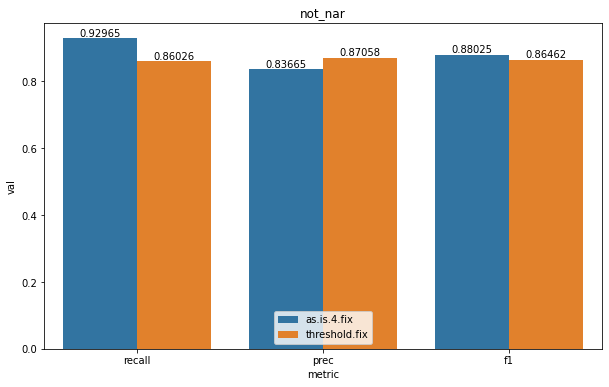

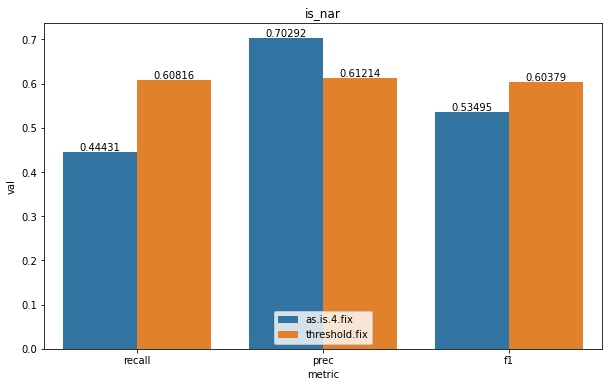

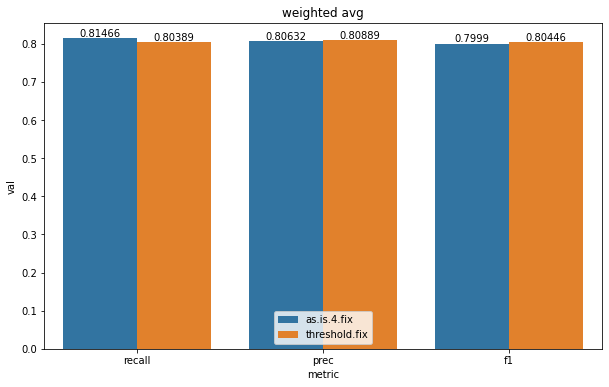

Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.fixed.comparison.threshold.csv, 
index True
float_format %.5f


In [173]:
imp.reload(common_utils)
acc_db=common_utils.show_comparison(ens_fix_compare)
common_utils.save_db(acc_db,dir_name,'ens.fixed.comparison.threshold',keep_index=True)

In [84]:
common_utils.save_db(bert_compare,dir_name,'bert.report.as.is.unsampled',keep_index=True,float_format='%.3f')

Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert.report.as.is.unsampled.csv, 
index True
float_format %.3f


In [125]:
crf_compare=reports['crf']['as.is'].merge(reports['crf']['usampl'],left_index=True,right_index=True)
crf_compare.set_index('label', inplace=True)
crf_compare.sort_index(axis=1,inplace=True)
crf_compare

,f1_as.is,f1_usampl,prec_as.is,prec_usampl,recall_as.is,recall_usampl
label,,,,,,
not_nar,0.86312,0.701,0.83425,0.680,0.89540,0.734
is_nar,0.51094,0.667,0.61056,0.712,0.45370,0.642
weighted avg,0.78187,0.684,0.78275,0.696,0.79279,0.688


In [89]:
common_utils.save_db(crf_compare,dir_name,'crf.report.as.is.unsampled',keep_index=True,float_format='%.3f')

Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.report.as.is.unsampled.csv, 
index True
float_format %.3f


In [126]:
ens_compare=reports['ens']['as.is.4'].merge(reports['ens']['usampl'],left_index=True,right_index=True)
ens_compare.set_index(crf_compare.index, inplace=True)
ens_compare.sort_index(axis=1,inplace=True)
ens_compare

,f1_as.is.4,f1_usampl,prec_as.is.4,prec_usampl,recall_as.is.4,recall_usampl
label,,,,,,
not_nar,0.87757,0.73374,0.83017,0.71922,0.93186,0.76235
is_nar,0.51325,0.71133,0.69375,0.75440,0.41878,0.68947
weighted avg,0.79249,0.72254,0.80002,0.73681,0.80933,0.72591


In [92]:
common_utils.save_db(ens_compare,dir_name,'ens.report.as.is.unsampled',keep_index=True,float_format='%.3f')

Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.report.as.is.unsampled.csv, 
index True
float_format %.3f


## Merge fixed ensemble: as is and with threshold

In [162]:
reports['ens']['threshold.fix']

,sent_f1,f1_threshold.fix,sent_recall,recall_threshold.fix,sent_prec,prec_threshold.fix
0,0.86099,0.86462,0.85753,0.86026,0.86590,0.87058
1,0.59052,0.60379,0.59476,0.60816,0.59616,0.61214
2,0.79857,0.80446,0.79806,0.80389,0.80235,0.80889


In [163]:
reports['ens']['as.is.4.fix']

,f1_as.is.4.fix,recall_as.is.4.fix,prec_as.is.4.fix
0,0.88025,0.92965,0.83665
1,0.53495,0.44431,0.70292
2,0.79990,0.81466,0.80632


In [168]:
ens_fix_compare=reports['ens']['threshold.fix'].merge(reports['ens']['as.is.4.fix'],left_index=True,right_index=True)
ens_fix_compare.set_index(crf_compare.index, inplace=True)
ens_fix_compare.sort_index(axis=1,inplace=True)
ens_fix_compare.drop(columns=['sent_f1','sent_prec','sent_recall'],inplace=True)

In [170]:
ens_fix_compare

,f1_as.is.4.fix,f1_threshold.fix,prec_as.is.4.fix,prec_threshold.fix,recall_as.is.4.fix,recall_threshold.fix
label,,,,,,
not_nar,0.88025,0.86462,0.83665,0.87058,0.92965,0.86026
is_nar,0.53495,0.60379,0.70292,0.61214,0.44431,0.60816
weighted avg,0.79990,0.80446,0.80632,0.80889,0.81466,0.80389


In [172]:
common_utils.save_db(ens_fix_compare,dir_name,'ens.report.as.is.threshold',keep_index=True,float_format='%.3f')

Saving /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.report.as.is.threshold.csv, 
index True
float_format %.3f
